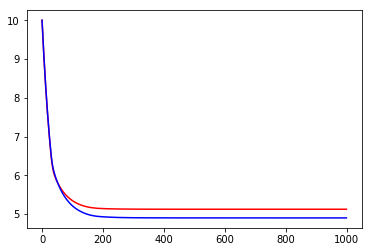

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split 

def Computecost(X,y,w,C,m):
    e = 1 - y * (np.dot(X,w.T) + b)
    for i in range(m):
        if e[i] <0 :
            e[i] = 0
    J = 2*np.dot(w,w.T) + C/m * np.sum(e)
    return J,e
  
def gradientDescent(X,y,w,b,alpha,C,num_iters):
    m,n= np.shape(X)
    L_train = []
    L_validation = []
    for i in range(num_iters):
        J,e = Computecost(X,y,w,C,m)
        L_train.append(J)
        J,s = Computecost(X_test,y_test,w,C,m_test)
        L_validation.append(J)
        for k in range(m):
            if e[k] >0 :
                e[k] = 1
        w = w - (alpha/m * C*(w - 1/m*np.dot(e.T,(np.tile(y,n).reshape(n,m).T * X)))).T
        b = b - (alpha/m * C*np.sum(1/m*(-y)*e))
        

    return w,L_train,L_validation

      
x,y = load_svmlight_file("E:/australian_scale.txt")
X=x.toarray()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
m_test,n_test = np.shape(X_test)

w = np.zeros(n_test).transpose()
b = 0
Iteration = range(1000)

w,L_train,L_validation = gradientDescent(X_train,y_train,w,b,1,10,1000)

plt.plot(Iteration,L_train,'r')
plt.plot(Iteration,L_validation,'b') 
plt.show()

In [38]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file


def sigmoid(z):
    return 1/(1+np.exp(-z))

def Computecost(X,y,w,m):
    e = 1 - y * (np.dot(X,w.T) + b)
    for i in range(m):
        if e[i] <0 :
            e[i] = 0
    J = 2*np.dot(w,w.T) + 1/m * np.sum(e)
    return J,e

def gradientDescent(X,y,w,b,alpha,num_iters):
    m,n= np.shape(X)
    L = []
    for i in range(num_iters):
        J,e = Computecost(X_test,y_test,w,m_test)
        L.append(J)
        J,e = Computecost(X,y,w,m)
        for k in range(m):
            if e[k] >0 :
                e[k] = 1
        L.append(J)
        w = w - (alpha/m * 1/n*(w - 1/m*np.dot(e.T,(np.tile(y,n).reshape(n,m).T * X)))).T
        b = b - (alpha/m * 1/n*np.sum(1/m*(-y)*e))
    return L

def Adadelta(X,y,w,p,elp,num_iters):
    m,n = np.shape(X)
    L = []
    Eg = np.zeros(n)
    exs = np.zeros(n)
    for i in range(num_iters):
        J,e = Computecost(X_test,y_test,w,m_test)
        L.append(J)
        J,e = Computecost(X,y,w,m)
        for k in range(m):
            if e[k] >0 :
                e[k] = 1
        g = 1/m * 1*(w - 1/m*np.dot(e.T,(np.tile(y,n).reshape(n,m).T * X))).T
        Eg = p*(Eg)+(1-p)*(g**2)
        delta = (np.sqrt(exs**2 + elp))/np.sqrt(Eg**2 + elp)*(-g)
        exs = p*exs + (1-p)*delta**2
        w = w + delta
    return L

def RMSprop(X,y,w,alpha,elp,num_iters):
    m,n = np.shape(X)
    L = []
    Eg = np.zeros(n).T
    for i in range(num_iters):
        J,e = Computecost(X_test,y_test,w,m_test)
        L.append(J)
        J,e = Computecost(X,y,w,m)
        for k in range(m):
            if e[k] >0 :
                e[k] = 1
        g = 1/m * 1*(w - 1/m*np.dot(e.T,(np.tile(y,n).reshape(n,m).T * X))).T
        Eg = 0.5 * (Eg+(g**2))
        RMS = np.sqrt(Eg + elp)
        w = w - alpha/RMS * g
    return L
        

X_train,y_train = load_svmlight_file("E:/a9a_train.txt")
X_train = X_train.toarray()
X_test,y_test = load_svmlight_file("E:/a9a.txt")
X_test = X_test.toarray()
m_train, n_train = np.shape(X_train)
m_test,n_test = np.shape(X_test)
X_train = np.column_stack((X_train,np.ones(m_train).T))
X_test = np.column_stack((X_test,np.zeros(m_test).T))
X_test = np.column_stack((X_test,np.ones(m_test).T))
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
m_train, n_train = np.shape(X_train)
m_test,n_test = np.shape(X_test)

w = np.zeros(n_train).transpose()
b = 0
Iteration = range(100)

L_NAG = gradientDescent(X_train,y_train,w,b,0.1,100)
L_Adadelta= Adadelta(X_train,y_train,w,0.95,1e-6,100)
L_RMSprop= RMSprop(X_train,y_train,w,0.02,1e-6,100)


plt.plot(Iteration,L_NAG,'r')
plt.show()
plt.plot(Iteration,L_RMSprop,'b')
plt.show()
plt.plot(Iteration,L_Adadelta,'g')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (200,)